# CRISPR_DeepEnsemble


In [1]:
# Import and set defaults
import CRISPR_DeepEnsemble
import torch as t
from scipy.stats import spearmanr, pearsonr 

t.manual_seed(123)
dtype = t.float64
t.set_default_dtype(dtype)

## Data

Here we have provided some sample data in the "data" directory. \
Ensure the data is formatted as follows:




In [2]:
# Data selection
workingDir = "data/"
# Samples (One hot encoded 30mer)
Samples = "merged_X.pt"
# Features (30mer melting point)
Features = "merged_Features.pt"
# Response (30mer Indel frequency)
Response = "merged_Y.pt"

In [3]:
# Example Implementation 

# Load data
S = t.load(f"{workingDir}/{Samples}").transpose(1,2).type(dtype)
F = t.load(f"{workingDir}/{Features}").reshape(-1,1).type(dtype)
# Scale response to ensure it is (0,1)
y = t.clamp((t.load(f"{workingDir}/{Response}")/100).type(dtype), 1e-3, 0.999)

# Shuffle the dataset 
perm = t.randperm(len(y)) 
S, F, y = S[perm, :, :], F[perm,:], y[perm]  

# Divide into test and train 
test_sample_count = 20000

S_test = S[-test_sample_count:,:,:].unsqueeze(dim=1)  
F_test = F[-test_sample_count:,:]
y_test =  y[-test_sample_count:]

S_train = S[:-test_sample_count,:,:].unsqueeze(dim=1)  
F_train = F[:-test_sample_count,:]
y_train = y[:-test_sample_count]

# Data loader used to train model
myData = CRISPR_DeepEnsemble.Seqs_and_Features(S=S[:-test_sample_count,:,:], F=F[:-test_sample_count,:], y=y[:-test_sample_count]) 

In [4]:
# Training a model, simply create a new RegressionDeepEnsemble object and call its `train_ensemble` method.
myEnsemble = CRISPR_DeepEnsemble.RegressionDeepEnsemble(BaseNet=CRISPR_DeepEnsemble.CRISPRnet, dataset=myData,
                                    n_estimators=25, batch_size=1000,
                                    response_var = t.distributions.Beta)
myEnsemble.train_ensemble(n_epochs=50)

/home/carl/.local/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Training Model 1/25 for 50 epochs...


  0%|          | 0/50 [00:00<?, ?it/s]/home/carl/.local/lib/python3.12/site-packages/torch/autograd/graph.py:744: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 50/50 [04:08<00:00,  4.97s/it]


Final Epoch Training Loss: -0.829
Training Model 2/25 for 50 epochs...


100%|██████████| 50/50 [04:07<00:00,  4.95s/it]


Final Epoch Training Loss: -0.802
Training Model 3/25 for 50 epochs...


100%|██████████| 50/50 [04:13<00:00,  5.08s/it]


Final Epoch Training Loss: -0.803
Training Model 4/25 for 50 epochs...


100%|██████████| 50/50 [04:11<00:00,  5.04s/it]


Final Epoch Training Loss: -0.803
Training Model 5/25 for 50 epochs...


100%|██████████| 50/50 [04:09<00:00,  4.98s/it]


Final Epoch Training Loss: -0.864
Training Model 6/25 for 50 epochs...


100%|██████████| 50/50 [04:11<00:00,  5.03s/it]


Final Epoch Training Loss: -0.761
Training Model 7/25 for 50 epochs...


100%|██████████| 50/50 [04:25<00:00,  5.31s/it]


Final Epoch Training Loss: -0.827
Training Model 8/25 for 50 epochs...


100%|██████████| 50/50 [04:25<00:00,  5.31s/it]


Final Epoch Training Loss: -0.877
Training Model 9/25 for 50 epochs...


100%|██████████| 50/50 [04:23<00:00,  5.27s/it]


Final Epoch Training Loss: -0.775
Training Model 10/25 for 50 epochs...


100%|██████████| 50/50 [04:21<00:00,  5.23s/it]


Final Epoch Training Loss: -0.790
Training Model 11/25 for 50 epochs...


100%|██████████| 50/50 [04:13<00:00,  5.08s/it]


Final Epoch Training Loss: -0.768
Training Model 12/25 for 50 epochs...


100%|██████████| 50/50 [04:26<00:00,  5.33s/it]


Final Epoch Training Loss: -0.765
Training Model 13/25 for 50 epochs...


100%|██████████| 50/50 [08:38<00:00, 10.38s/it]


Final Epoch Training Loss: -0.884
Training Model 14/25 for 50 epochs...


100%|██████████| 50/50 [04:32<00:00,  5.46s/it]


Final Epoch Training Loss: -0.819
Training Model 15/25 for 50 epochs...


100%|██████████| 50/50 [04:16<00:00,  5.14s/it]


Final Epoch Training Loss: -0.792
Training Model 16/25 for 50 epochs...


100%|██████████| 50/50 [04:18<00:00,  5.17s/it]


Final Epoch Training Loss: -0.792
Training Model 17/25 for 50 epochs...


100%|██████████| 50/50 [04:07<00:00,  4.95s/it]


Final Epoch Training Loss: -0.877
Training Model 18/25 for 50 epochs...


100%|██████████| 50/50 [04:11<00:00,  5.03s/it]


Final Epoch Training Loss: -0.866
Training Model 19/25 for 50 epochs...


100%|██████████| 50/50 [04:21<00:00,  5.23s/it]


Final Epoch Training Loss: -0.833
Training Model 20/25 for 50 epochs...


100%|██████████| 50/50 [04:16<00:00,  5.12s/it]


Final Epoch Training Loss: -0.788
Training Model 21/25 for 50 epochs...


100%|██████████| 50/50 [04:16<00:00,  5.13s/it]


Final Epoch Training Loss: -0.859
Training Model 22/25 for 50 epochs...


100%|██████████| 50/50 [04:12<00:00,  5.04s/it]


Final Epoch Training Loss: -0.810
Training Model 23/25 for 50 epochs...


100%|██████████| 50/50 [04:10<00:00,  5.01s/it]


Final Epoch Training Loss: -0.815
Training Model 24/25 for 50 epochs...


100%|██████████| 50/50 [04:14<00:00,  5.10s/it]


Final Epoch Training Loss: -0.776
Training Model 25/25 for 50 epochs...


100%|██████████| 50/50 [04:09<00:00,  4.99s/it]

Final Epoch Training Loss: -0.755
Training Complete!


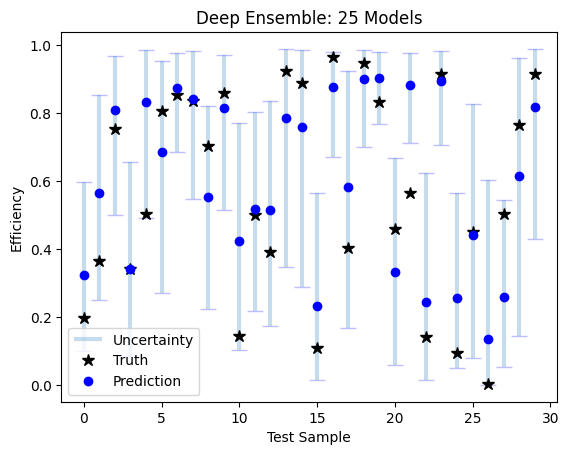

In [5]:
# Example uncertainty plot
L,U,IQR = myEnsemble.uncertainty_bounds(inputs =(S_test, F_test), n_samples=1000,
                                    lower=0.01, upper=0.99) 
pred = myEnsemble.predict(inputs = (S_test, F_test))

# below line gives sorting order for some input (e.g., prediction, true value, or uncertainty bounds)
# _ids = t.argsort(y_test, descending=True)
# ids = _ids[:30]

# below line show the first 30 results
ids = range(30)

myEnsemble.plot_uncertainties(inputs=(S_test[ids,:,:,:], F_test[ids,:]), 
                              true_vals = y_test[ids], plot_means=False,
                              lower=0.025, upper=0.975)

In [6]:
# Compute Spearman correlation between predictions and true answers in test set
vals = (pred.numpy(), y_test)
print(f"Spearman: {round(spearmanr(*vals)[0],3)}, Pearson: {round(pearsonr(*vals)[0],3)}")

Spearman: 0.843, Pearson: 0.839


In [7]:
# Save model
myEnsemble.save('CRISPR_DeepEnsemble')

In [ ]:
# Load model
# NOTE: If you are getting import errors when loading the model uncomment the two lines below
# import sys
# sys.modules['CRISPR_DeepEnsemble'] = CRISPR_DeepEnsemble

newEnsemble = CRISPR_DeepEnsemble.RegressionDeepEnsemble(load_from='CRISPR_DeepEnsemble.zip')

# Predict values
L,U,IQR = newEnsemble.uncertainty_bounds(inputs =(S_test, F_test), n_samples=1000,
                                    lower=0.01, upper=0.99) 
loaded_pred = newEnsemble.predict(inputs = (S_test, F_test))

# Compute Spearman correlation between predictions and true answers in test set
vals = (loaded_pred.numpy(), y_test)
print(f"Spearman: {round(spearmanr(*vals)[0],3)}, Pearson: {round(pearsonr(*vals)[0],3)}")

Spearman: 0.843, Pearson: 0.839
